In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [2]:
importlib.reload(au)

<module 'analysis_utils' from 'c:\\Users\\thoma\\Documents\\SIMPLE\\Nanoparticle\\Scripts\\Simulations\\SIMPLE_lorentzforce\\Experiment analysis\\analysis_utils.py'>

In [301]:
path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Background\\tt'
files = np.linspace(0, 9, 10, dtype=int)
end = '.hdf5'
PSDs = np.zeros((len(files), 50001))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    fs = round(1/attrs['delta_t'])
    PSD = scisig.welch(data['channel_d'], fs=fs, nperseg=int(0.1*fs))
    PSDs[n] = PSD[1]
frequency = PSD[0]

In [302]:
PSD_avr_bg2 = sum(PSDs)/len(PSDs)

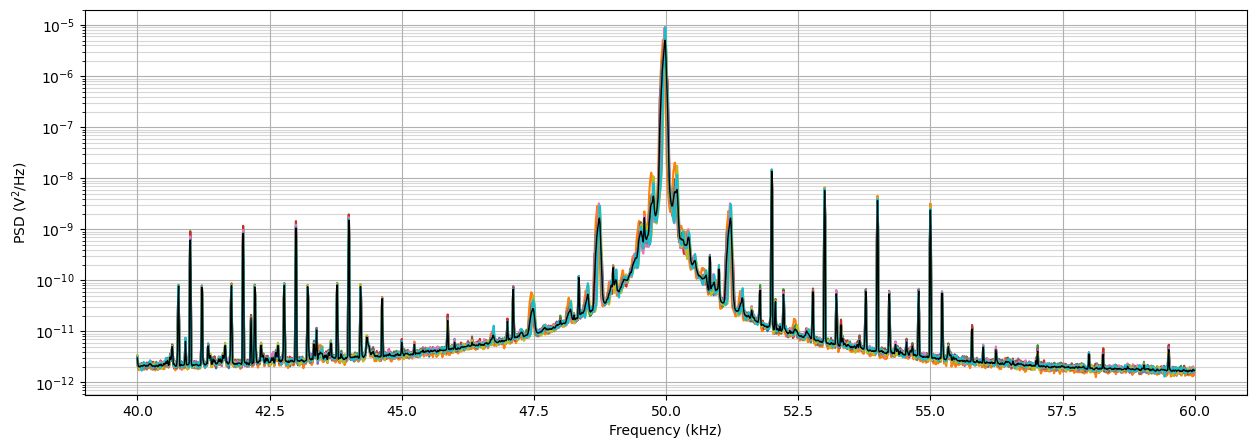

In [303]:
lb = 4000
ub = 6000
plt.figure(figsize = (15, 5))
for PSD in PSDs:
    plt.plot(frequency[lb:ub]/1000, PSD[lb:ub])
plt.plot(frequency[lb:ub]/1000, PSD_avr_bg2[lb:ub], 'k', linewidth = 1)
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.grid()
plt.grid(which = 'minor', alpha = 0.5)

In [304]:
path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Background 2\\tt'
files = np.linspace(0, 9, 10, dtype=int)
end = '.hdf5'
PSDs = np.zeros((len(files), 50001))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    fs = round(1/attrs['delta_t'])
    PSD = scisig.welch(data['channel_d'], fs=fs, nperseg=int(0.1*fs))
    PSDs[n] = PSD[1]
frequency = PSD[0]

In [305]:
PSD_avr_m1 = sum(PSDs)/len(PSDs)

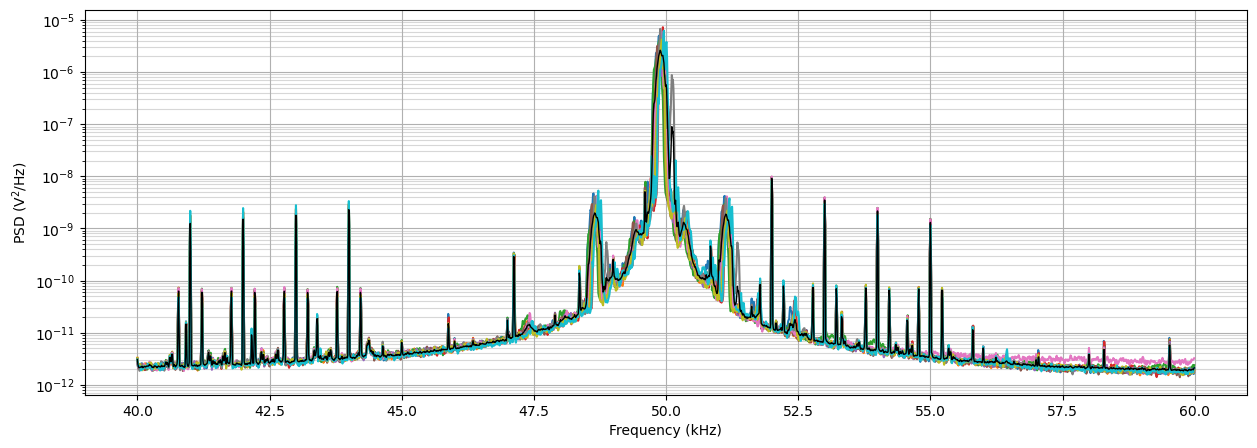

In [306]:
lb = 4000
ub = 6000
plt.figure(figsize = (15, 5))
for PSD in PSDs:
    plt.plot(frequency[lb:ub]/1000, PSD[lb:ub])
plt.plot(frequency[lb:ub]/1000, PSD_avr_m1[lb:ub], 'k', linewidth = 1)
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.grid()
plt.grid(which = 'minor', alpha = 0.5)

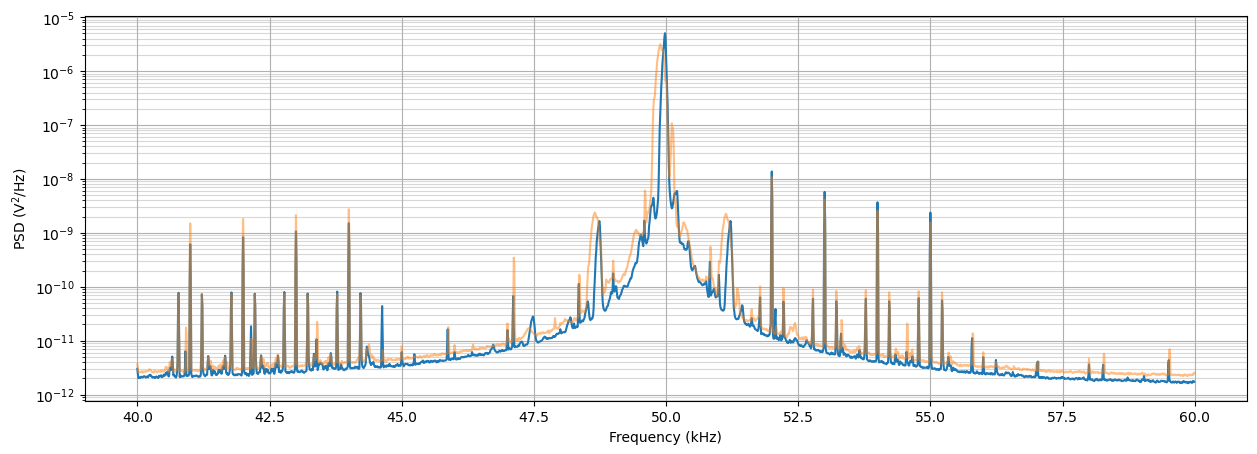

In [307]:
lb = 4000
ub = 6000
plt.figure(figsize = (15, 5))
plt.plot(frequency[lb:ub]/1000, PSD_avr_bg2[lb:ub])
plt.plot(frequency[lb:ub]/1000, PSD_avr_m1[lb:ub]*1.2, alpha = 0.5)
plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.grid()
plt.grid(which = 'minor', alpha = 0.5)

In [270]:
lb = 45000
ub = 55000
fit, cov = opt.curve_fit(au.Linewidth2, frequency[lb:ub], PSD_avr_bg2[lb:ub], p0 = [10**10, 50000, 100, 10**(-12)])
print(fit)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

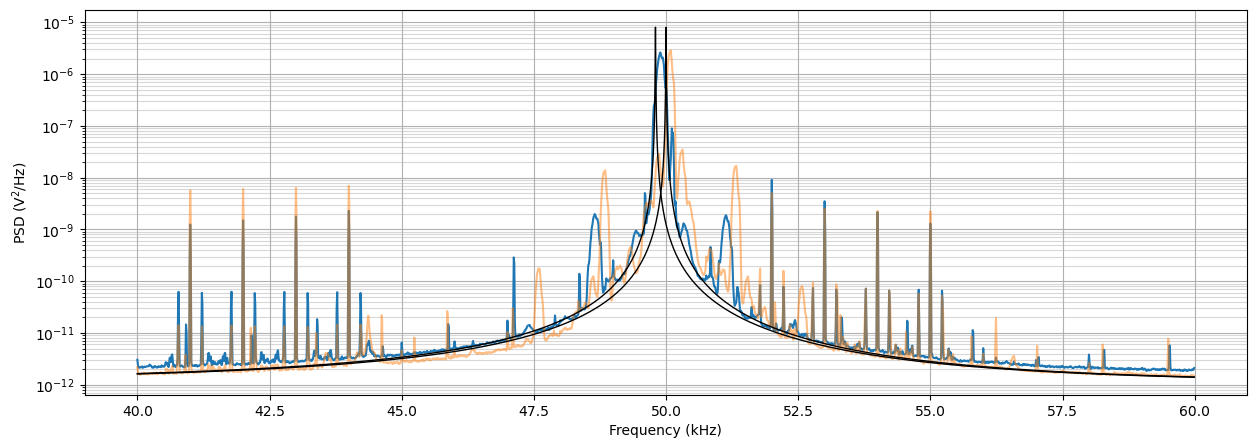

In [288]:
lb = 4000
ub = 6000
plt.figure(figsize = (15, 5))
plt.plot(frequency[lb:ub]/1000, PSD_avr_bg2[lb:ub])
plt.plot(frequency[lb:ub]/1000, PSD_avr_m1[lb:ub]*1.2, alpha = 0.5)

plt.plot(frequency[lb:ub]/1000, au.Linewidth2(frequency[lb:ub], 10**5, 49800, 5, 10**(-12)), 'k', linewidth = 1)
plt.plot(frequency[lb:ub]/1000, au.Linewidth2(frequency[lb:ub], 10**5, 50000, 5, 10**(-12)), 'k', linewidth = 1)

plt.yscale('log')
plt.ylabel('PSD (V$^2$/Hz)')
plt.xlabel('Frequency (kHz)')
plt.grid()
plt.grid(which = 'minor', alpha = 0.5)

In [138]:
filename = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Background 2\\tt0.hdf5'
data, attrs = au.load_data_lf(filename)

In [158]:
drive = data['channel_f']
drive2 = data['channel_d']
n = 0
fft_drive = np.fft.rfft(drive[n*10**6:(n+1)*10**6])
fft_drive2 = np.fft.rfft(drive2[n*10**6:(n+1)*10**6])

for i in [41000, 42000, 43000, 44000, 52000, 53000, 54000, 55000]:
    print(np.abs(fft_drive[i]), cmath.phase(fft_drive[i]))
    print(np.abs(fft_drive2[i]), cmath.phase(fft_drive2[i]))
    print(np.unwrap([-np.pi, cmath.phase(fft_drive[i])-cmath.phase(fft_drive2[i])]))
    print('') 

119194.16528398485 2.7162680860841886
109.05167676946215 -1.4451331938797944
[-3.14159265 -2.12178403]

117599.40548116685 0.1589259476843821
113.49740240092993 2.21106312756512
[-3.14159265 -2.05213718]

115742.00218700267 1.6869320501905132
117.79386815028433 -2.587939462827054
[-3.14159265 -2.00831379]

114081.89701642687 -0.8631887916245967
127.47191435502013 1.0833729578302205
[-3.14159265 -1.94656175]

99151.65000963793 -1.1351773675572898
122.52219922423008 3.1191678912399086
[-3.14159265 -4.25434526]

97106.11115337869 -0.8164800612820239
70.52795565150086 3.127645642335887
[-3.14159265 -3.9441257 ]

95275.38917955589 0.9454885536498151
54.68518597505527 -1.6239457157079955
[-3.14159265 -3.71375104]

93173.58103077955 0.9127524144994268
43.41634720263622 -1.962931189007846
[-3.14159265 -3.4075017 ]



In [178]:
path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Background 2\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases = []
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        phase = np.unwrap([-np.pi, cmath.phase(fft_drive[52000])-cmath.phase(fft_drive2[52000])])
        phases.append(phase[1])

path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Magnet 1\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases2 = []
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        phase = np.unwrap([-np.pi, cmath.phase(fft_drive[52000])-cmath.phase(fft_drive2[52000])])
        phases2.append(phase[1])

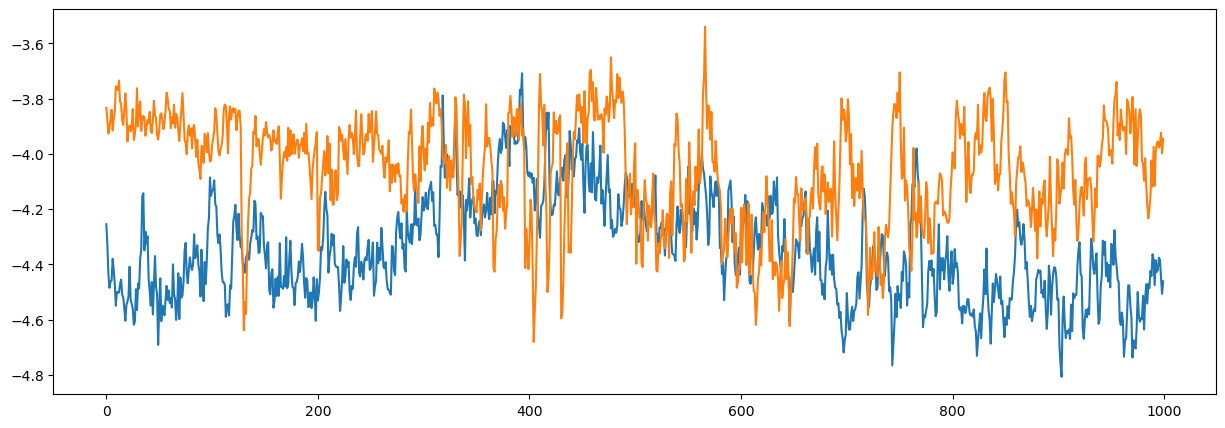

In [179]:
plt.figure(figsize = (15, 5))
plt.plot(phases)
plt.plot(phases2)
#plt.ylim(-2.5, -2)

In [292]:
freqs = [41000, 42000, 43000, 44000, 52000, 53000, 54000, 55000]

path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Background\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases = np.zeros((8, 1000))
amps = np.zeros((8, 1000))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for o, f in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[f])-cmath.phase(fft_drive2[f])])
            phases[o, n*10+i] = phase[1]
            amps[o, n*10+i] = np.abs(fft_drive[f])

path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Background 2\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases2 = np.zeros((8, 1000))
amps2 = np.zeros((8, 1000))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for o, f in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[f])-cmath.phase(fft_drive2[f])])
            phases2[o, n*10+i] = phase[1]
            amps2[o, n*10+i] = np.abs(fft_drive[f])

path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Magnet 1\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases3 = np.zeros((8, 1000))
amps3 = np.zeros((8, 1000))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for o, f in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[f])-cmath.phase(fft_drive2[f])])
            phases3[o, n*10+i] = phase[1]
            amps3[o, n*10+i] = np.abs(fft_drive[f])

path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Magnet 2\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases4 = np.zeros((8, 1000))
amps4 = np.zeros((8, 1000))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for o, f in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[f])-cmath.phase(fft_drive2[f])])
            phases4[o, n*10+i] = phase[1]
            amps4[o, n*10+i] = np.abs(fft_drive[f])

path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Magnet 3\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases5 = np.zeros((8, 1000))
amps5 = np.zeros((8, 1000))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for o, f in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[f])-cmath.phase(fft_drive2[f])])
            phases5[o, n*10+i] = phase[1]
            amps5[o, n*10+i] = np.abs(fft_drive[f])

path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Magnet 4\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases6 = np.zeros((8, 1000))
amps6 = np.zeros((8, 1000))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for o, f in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[f])-cmath.phase(fft_drive2[f])])
            phases6[o, n*10+i] = phase[1]
            amps6[o, n*10+i] = np.abs(fft_drive[f])

path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Background 3\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases7 = np.zeros((8, 1000))
amps7 = np.zeros((8, 1000))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for o, f in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[f])-cmath.phase(fft_drive2[f])])
            phases7[o, n*10+i] = phase[1]
            amps7[o, n*10+i] = np.abs(fft_drive[f])

In [308]:
freqs2 = np.linspace(40000, 60000, 20000)
th_phase = np.arctan(100*freqs2/(48850**2-freqs2**2))
th_phase2 = np.arctan(100*freqs2/(50100**2-freqs2**2))
avr_phases = np.mean(phases, axis=1)
avr_phases2 = np.mean(phases2, axis=1)
avr_phases3 = np.mean(phases3, axis=1)
avr_phases4 = np.mean(phases4, axis=1)
avr_phases5 = np.mean(phases5, axis=1)
avr_phases6 = np.mean(phases6, axis=1)
avr_phases7 = np.mean(phases7, axis=1)

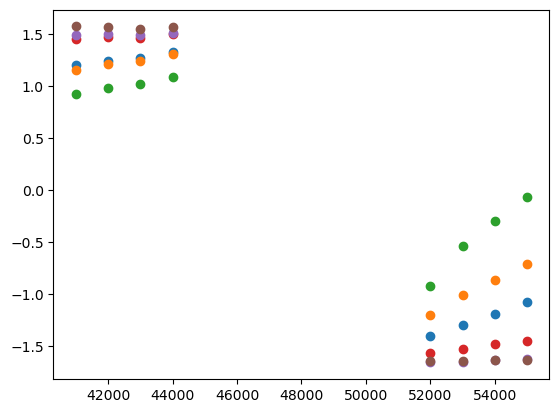

In [312]:
#plt.plot(freqs2, th_phase)
#plt.plot(freqs2, th_phase2)
plt.plot(freqs, avr_phases+np.pi, 'o')
plt.plot(freqs, avr_phases2+np.pi, 'o')
plt.plot(freqs, avr_phases3+np.pi, 'o')
plt.plot(freqs, avr_phases4+np.pi, 'o')
plt.plot(freqs, avr_phases5+np.pi, 'o')
plt.plot(freqs, avr_phases6+np.pi, 'o')
#plt.plot(freqs, avr_phases7+np.pi, 'o')

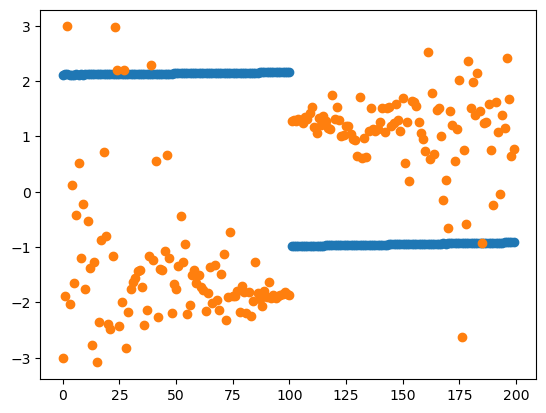

In [210]:
plt.plot([cmath.phase(i) for i in fft_drive[40900:41100]], 'o')
plt.plot([cmath.phase(i) for i in fft_drive2[40900:41100]] ,'o')

In [212]:
cmath.phase(fft_drive2[41000])

-1.8643626966833042

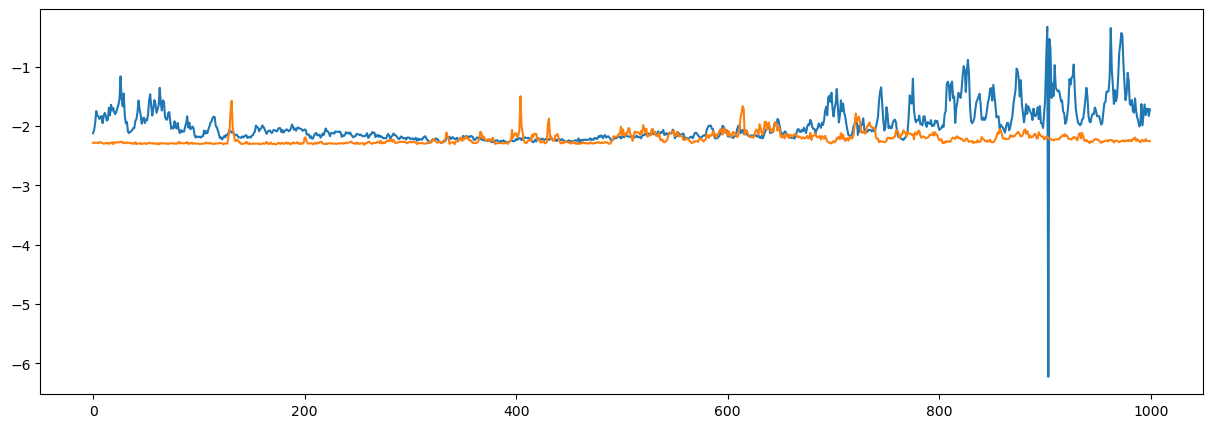

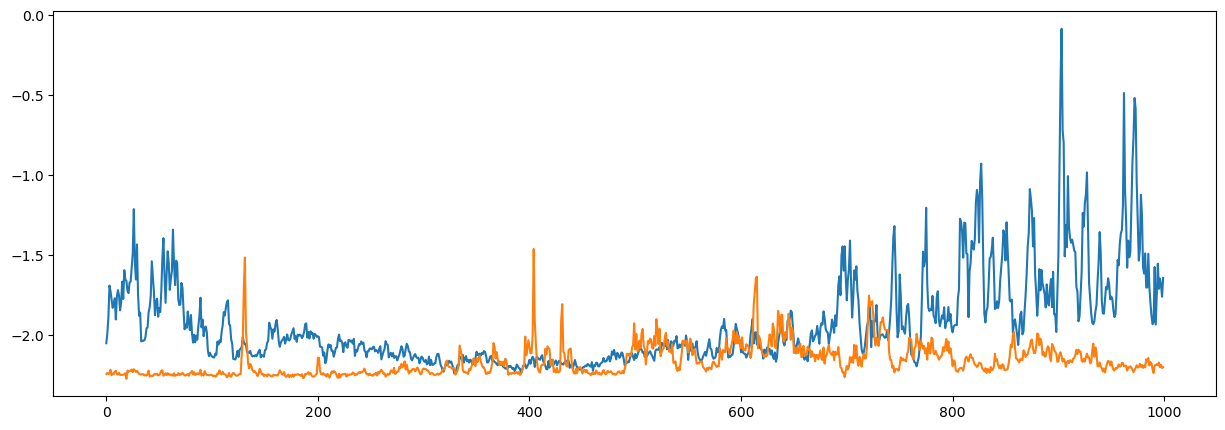

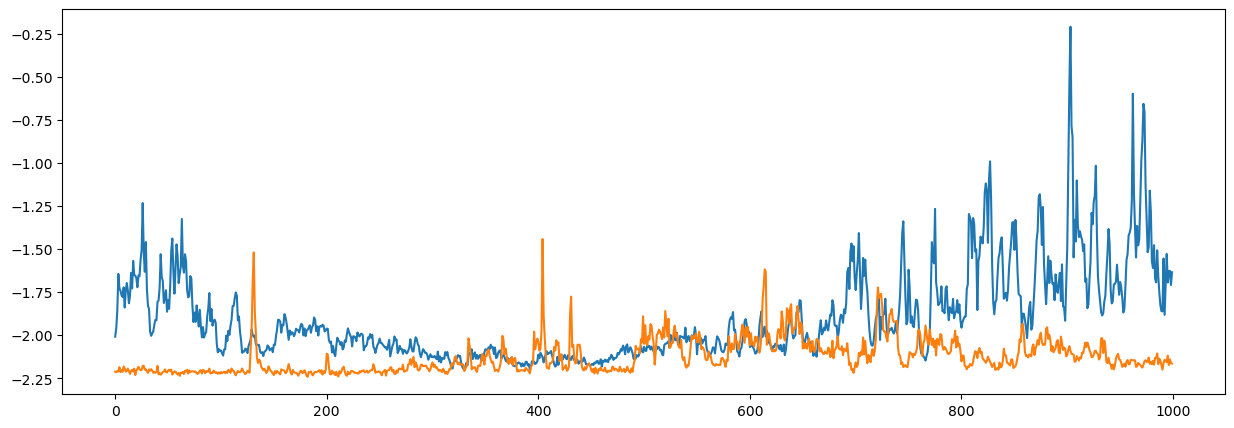

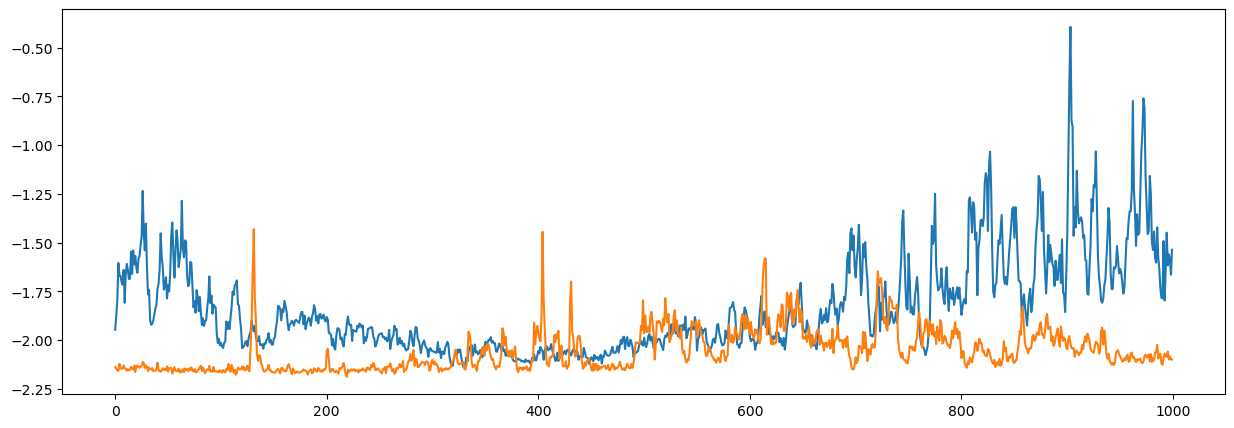

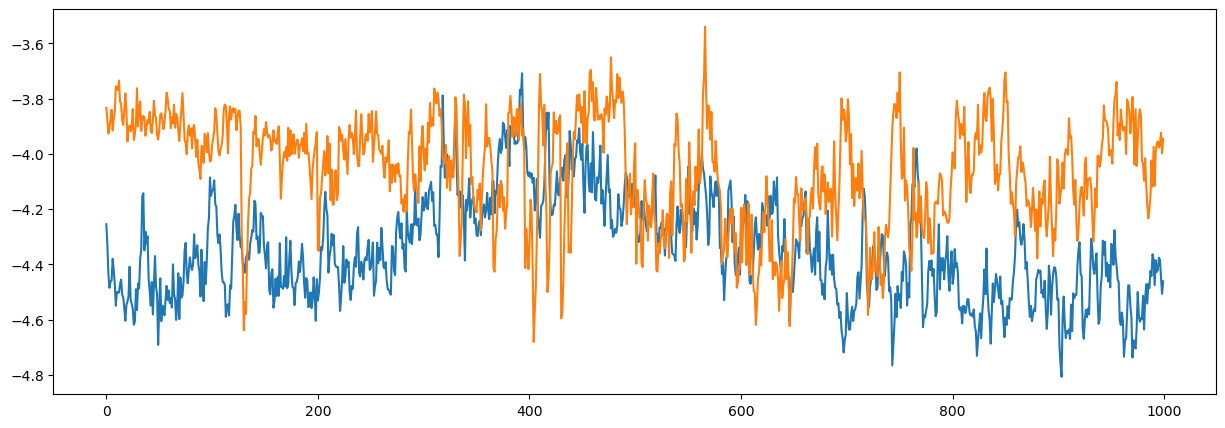

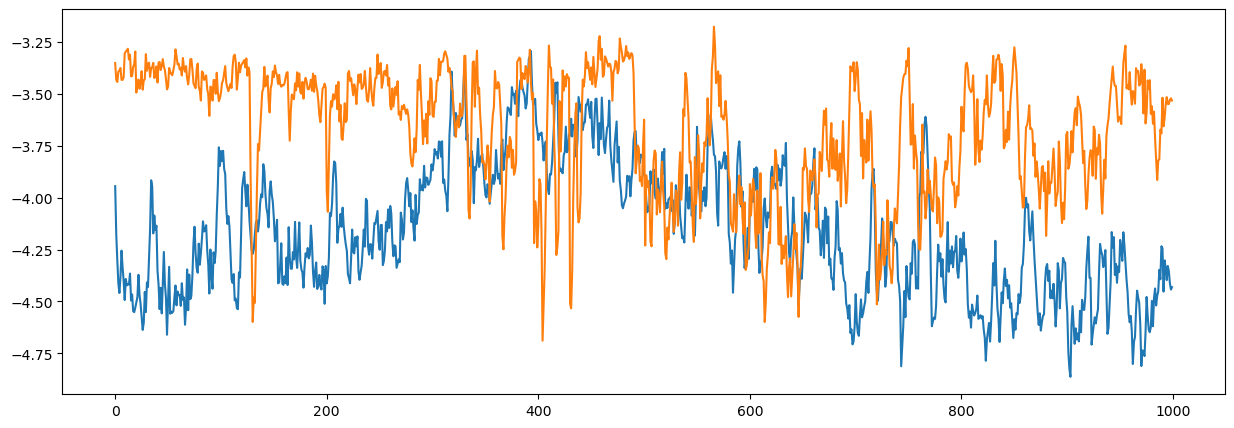

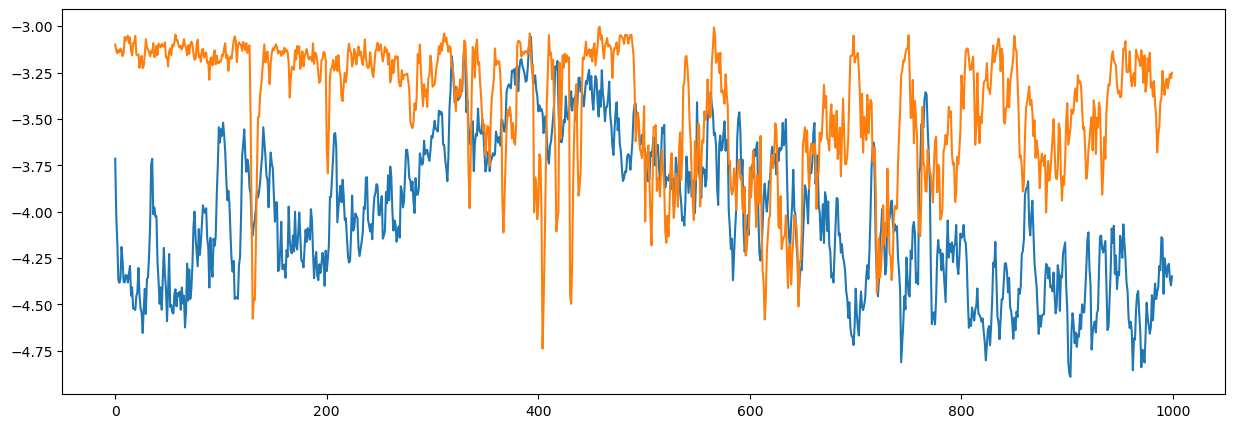

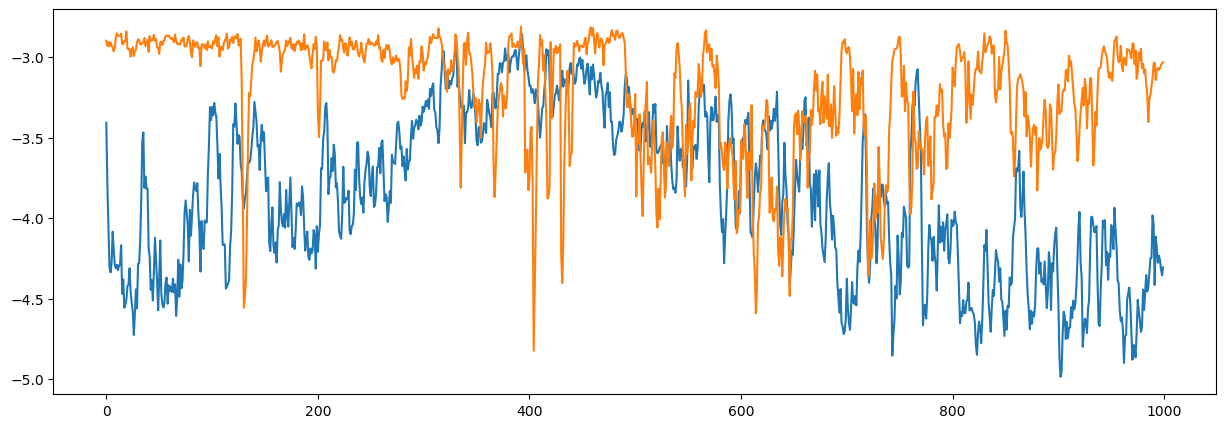

In [182]:
for n in range(8): 
    plt.figure(figsize = (15, 5))
    plt.plot(phases[n])
    plt.plot(phases2[n])

In [145]:
np.unwrap([4, -np.pi, 0, np.pi, 4])

array([ 4.        ,  3.14159265,  6.28318531,  9.42477796, 10.28318531])

In [115]:
0.001*180/np.pi

0.05729577951308232

In [110]:
import cmath

for i in [41000, 42000, 43000, 44000, 52000, 53000, 54000, 55000]:
    print(np.abs(fft_drive[i]), cmath.phase(fft_drive[i]))

119194.16528398485 2.7162680860841886
117599.40548116685 0.1589259476843821
115742.00218700267 1.6869320501905132
114081.89701642687 -0.8631887916245967
99151.65000963793 -1.1351773675572898
97106.11115337869 -0.8164800612820239
95275.38917955589 0.9454885536498151
93173.58103077955 0.9127524144994268


In [ ]:
phis = []
Rs = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    phis.append(phi)
    Rs.append(R)

In [163]:
freqs = [41000, 42000, 43000, 44000, 52000, 53000, 54000, 55000]

path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Background 3\\tt'
files = np.linspace(0, 99, 100, dtype=int)
end = '.hdf5'
phases = np.zeros((8, 1000))
amps = np.zeros((8, 1000))
cfs = np.zeros((1000))
PSDs = np.zeros((1000, 2000))
for n, file in enumerate(files):
    filename = path + str(file) + end
    data, attrs = au.load_data_lf(filename)
    fs = 1/attrs['delta_t']
    for i in range(10):
        drive = data['channel_f'][i*10**6:(i+1)*10**6]
        drive2 = data['channel_d'][i*10**6:(i+1)*10**6]
        fft_drive = np.fft.rfft(drive)
        fft_drive2 = np.fft.rfft(drive2)
        for o, f in enumerate(freqs):
            phase = np.unwrap([-np.pi, cmath.phase(fft_drive[f])-cmath.phase(fft_drive2[f])])
            phases[o, n*10+i] = phase[1]
            amps[o, n*10+i] = np.abs(fft_drive[f])
        PSD = scisig.welch(drive2, fs=fs, nperseg=int(0.1*fs))
        PSDs[n*10+i] = PSD[1][4000:6000]
        cfs[n*10+i] = np.argmax(PSD[1][4000:6000])*10+40000

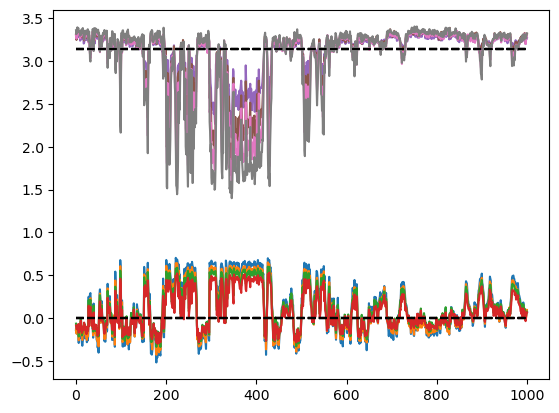

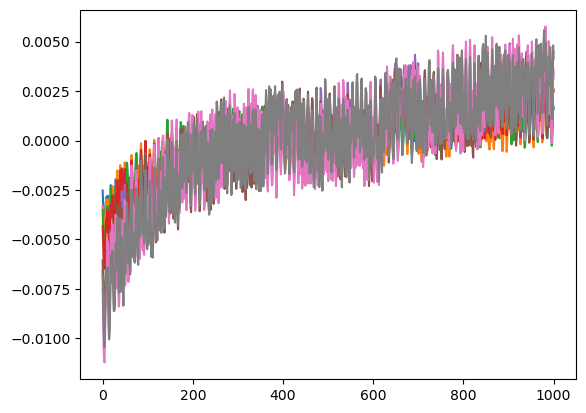

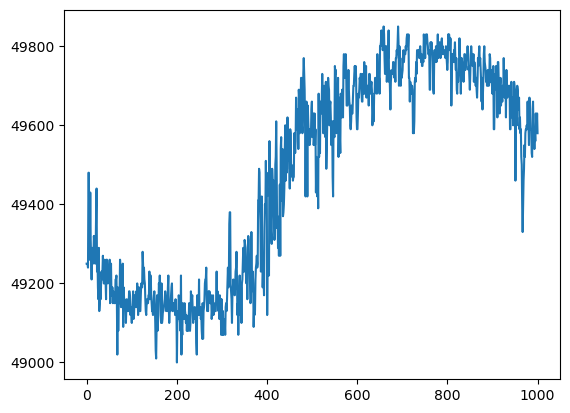

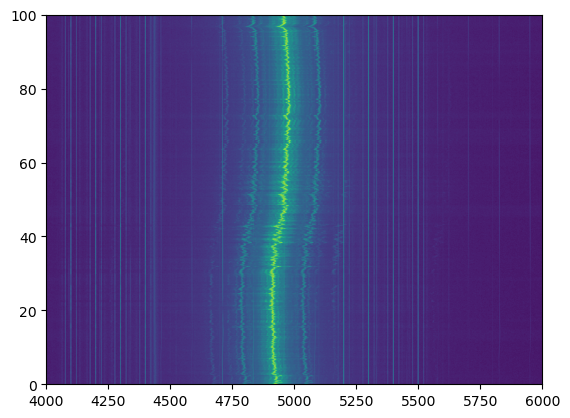

In [170]:
time = np.linspace(0, 1000, 1000)
plt.figure()
for phase in phases:
    plt.plot(time, -(phase+np.pi/2))
    plt.plot([time[0], time[-1]], [0,0], 'k--')
    plt.plot([time[0], time[-1]], [np.pi,np.pi], 'k--')

plt.figure()
for amp in amps[:]:
    plt.plot(time, (amp-np.mean(amp))/np.mean(amp))
plt.figure()
plt.plot(time, cfs)
plt.figure()
plt.imshow(np.log(PSDs), aspect = 'auto', extent = [4000, 6000, 0, 100], origin = 'lower')

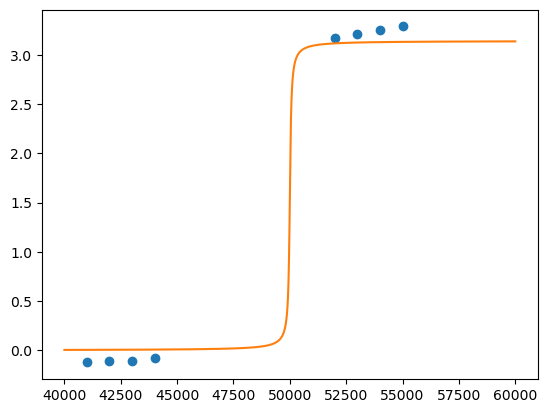

In [168]:
freqs3 = np.linspace(40000, 60000, 20000)
plt.plot(freqs[:4], np.mean((phases[:4])-np.pi/2, axis=1)+np.pi, 'o')
plt.plot(freqs[4:], np.mean((phases[4:])+3*np.pi/2, axis=1)+np.pi, 'o', color = 'tab:blue')
plt.plot(freqs3, np.arccos((50000**2-freqs3**2)/np.sqrt((50000**2-freqs3**2)**2+(100*freqs3)**2)))

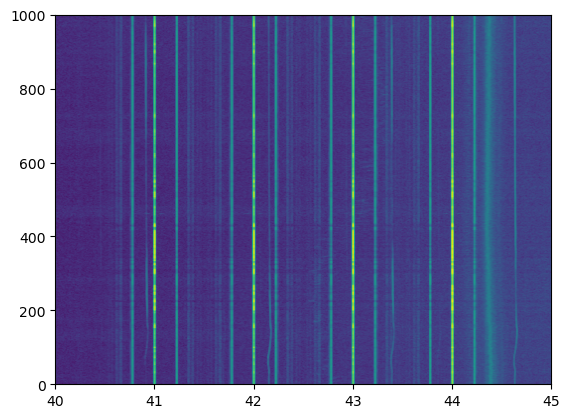

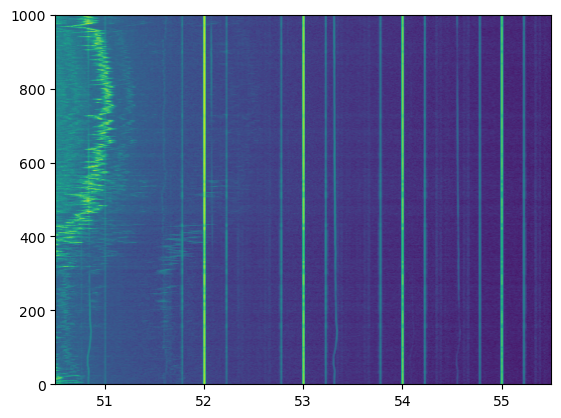

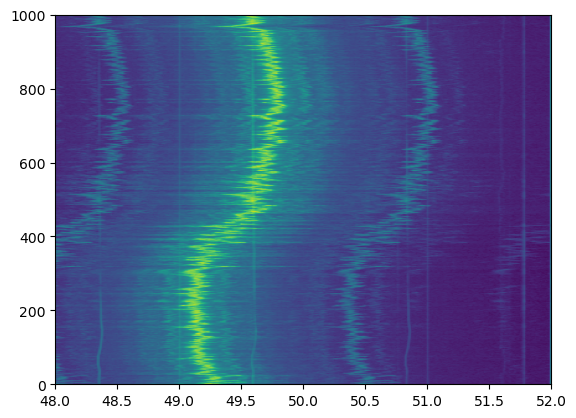

In [166]:
plt.figure()
plt.imshow(np.log(PSDs[:, :500]), aspect = 'auto', extent = [40, 45, 0, 1000], origin = 'lower')
plt.figure()
plt.imshow(np.log(PSDs[:, 1050:1550]), aspect = 'auto', extent = [50.5, 55.5, 0, 1000], origin = 'lower')
plt.figure()
plt.imshow(np.log(PSDs[:, 800:1200]), aspect = 'auto', extent = [48, 52, 0, 1000], origin = 'lower')

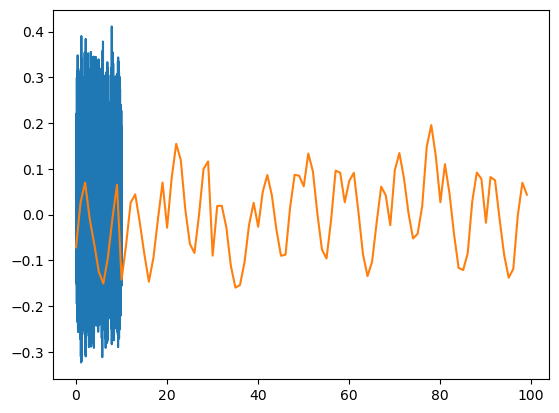

In [171]:
plt.plot(np.linspace(0, 10, 10000), data['channel_d'][::1000])
plt.plot(time[:100], (amps[0][-100:]-np.mean(amps[0][-100:]))/1000)

In [180]:
path = r'D:\Lab Data\lorentz_force\sphere20250429\20250501\Data 1\Background 3\\tt'
file = 26
end = '.hdf5'
filename = path + str(file) + end
data, attrs = au.load_data_lf(filename)
fs = 1/attrs['delta_t']
drive = data['channel_f']
drive2 = data['channel_d']

In [181]:
drive_filt = au.butter_bandpass_filter(drive, 55000-100, 55000+100, fs = fs, order = 3)
drive2_filt = au.butter_bandpass_filter(drive2, 55000-100, 55000+100, fs = fs, order = 3)

drive3_filt = au.butter_bandpass_filter(drive, 41000-100, 41000+100, fs = fs, order = 3)
drive4_filt = au.butter_bandpass_filter(drive2, 41000-100, 41000+100, fs = fs, order = 3)

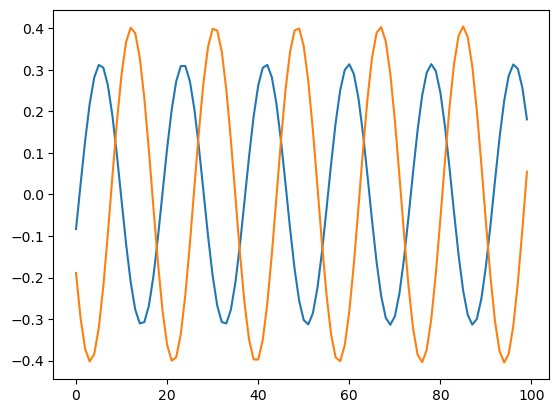

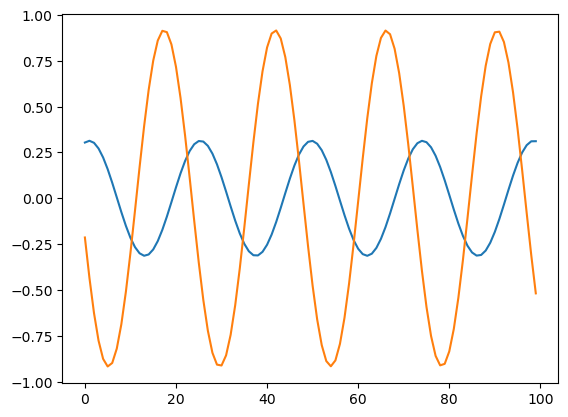

In [182]:
plt.plot(drive_filt[500000:500100])
plt.plot(drive2_filt[499992+8:500092+8]*3000)
plt.figure()
plt.plot(drive3_filt[500000:500100])
plt.plot(drive4_filt[499992+8:500092+8]*3000)

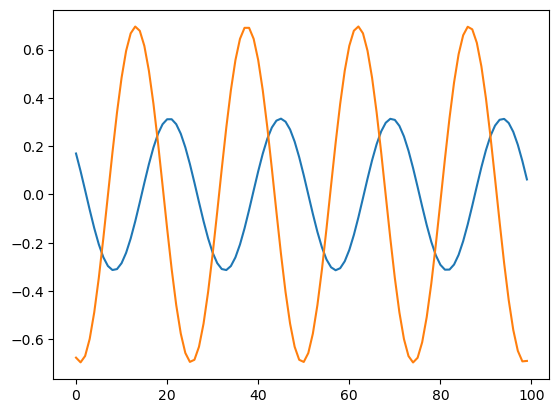

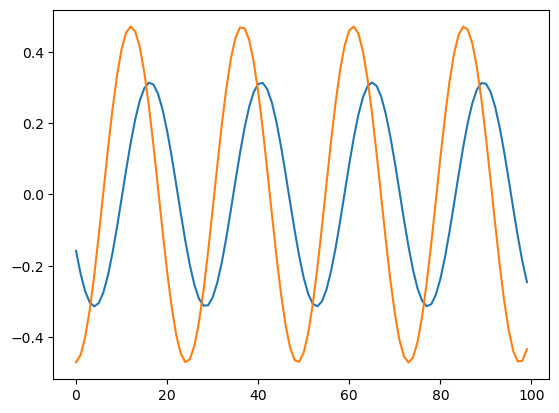

In [183]:
plt.figure()
plt.plot(drive3_filt[1000000:1000100])
plt.plot(drive4_filt[1000000:1000100]*3000)

plt.figure()
plt.plot(drive3_filt[9000000:9000100])
plt.plot(drive4_filt[9000000:9000100]*3000)

In [146]:
8*41000/55000

5.963636363636364

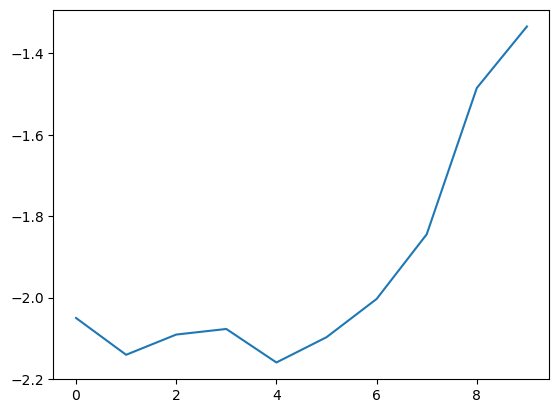

In [179]:
plt.plot(phases[0][260:270])

In [256]:
freqs = [41000, 42000, 43000, 44000, 52000, 53000, 54000, 55000]

path = r'D:\Lab Data\lorentz_force\sphere20250429\20250429\Vbal'
file = r'\3.17'
end = '.mat'
phases = np.zeros((8, 10))
amps = np.zeros((8, 10))
cfs = np.zeros((10))
PSDs = np.zeros((10, 2000))
filename = path + file + end
data = sio.loadmat(filename)
fs = 1/data['Tinterval'][0][0]
tdel = -2
for i in range(1, 9):
    drive = np.transpose(data['F'])[0][i*10**6+tdel:(i+1)*10**6+tdel]
    drive2 = np.transpose(data['D'])[0][i*10**6:(i+1)*10**6]
    fft_drive = np.fft.rfft(drive)
    fft_drive2 = np.fft.rfft(drive2)
    for o, f in enumerate(freqs):
        phase = (cmath.phase(fft_drive[f])-cmath.phase(fft_drive2[f]))%(2*np.pi)
        phases[o, i] = phase
        amps[o, i] = np.abs(fft_drive[f])
    PSD = scisig.welch(drive2, fs=fs, nperseg=int(0.1*fs))
    PSDs[i] = PSD[1][4000:6000]
    #cfs[i] = np.argmax(PSD[1][4000:6000])*10+40000

In [257]:
meanphase = np.mean(phases[:,1:9], axis=1)
meanamps = np.mean(amps[:,1:9], axis=1)

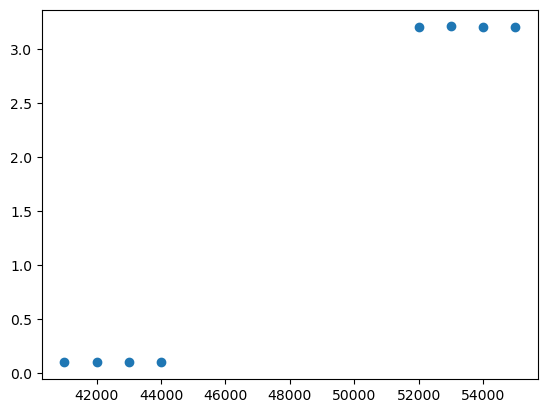

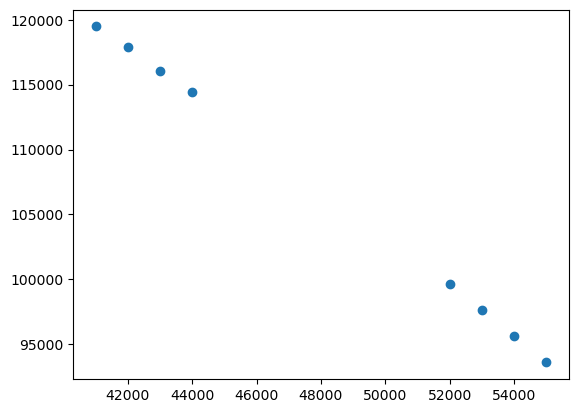

In [258]:
plt.plot(freqs, meanphase, 'o')
plt.figure()
plt.plot(freqs, meanamps, 'o')

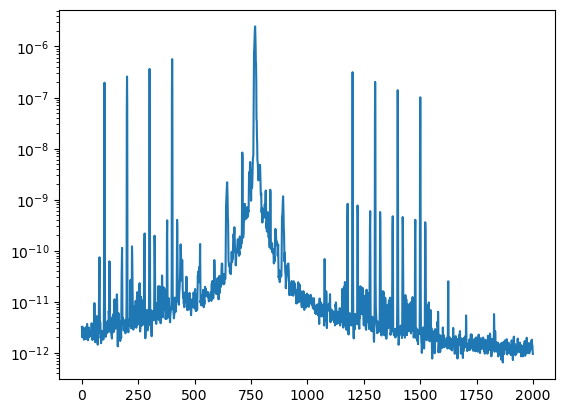

In [249]:
plt.plot(PSDs[1])
plt.yscale('log')